In [5]:
import numpy as np
from astropy.io import fits
import astropy.units as u
from IPython.display import clear_output
from pathlib import Path
from importlib import reload
import time
import os

import cupy as cp

import poppy
from poppy.poppy_core import PlaneType

import misc

# set debugging mode for more information from POPPY as propagation is performed
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = False

import poppy_optics
clear_output()

# Test all the optics on a GPU by setting the configuration for CuPy to True.

In [7]:
poppy.conf.use_cupy = True

reload(poppy_optics)
from poppy_optics import *

DEBUG:poppy:Initialized: Primary, fl =5.52e+00 m
DEBUG:poppy:Initialized: Secondary, fl =-6.79e-01 m
DEBUG:poppy:Trans: fits-files/roman_pupil_309.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from fits-files/roman_pupil_309.fits
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.007741935483870968
DEBUG:poppy:Trans: None
DEBUG:poppy:OPD: fits-files/roman_primary_opd_529.fits
DEBUG:poppy:No transmission supplied - will assume uniform throughput = 1 
INFO:poppy:Roman Primary OPD: Loaded OPD from fits-files/roman_primary_opd_529.fits
INFO:poppy:No info supplied on amplitude transmission; assuming uniform throughput = 1
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.004536862003780718
DEBUG:poppy:Trans: fits-files/roman_pupil_309.fits
DEBUG:poppy:OPD: fits-files/roman_primary_opd_309.fits
INFO:poppy:Roman Primary: Loaded amplitude transmission from fits-files/roman_pupil_309.fits
INFO:poppy:Roman Primary: Loaded OPD 

# Test creating a fixed sampling optic in order.
Useful for debugging to ensure the amplitude/transmission and the OPD of an optic are calculated as expected. 

DEBUG:poppy:Converting Zernike WFE to fixed sampling with grid_size=2.4 m, npix=256, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Zernike WFE sampled onto 1024 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Zernike WFE sampled onto 1024 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


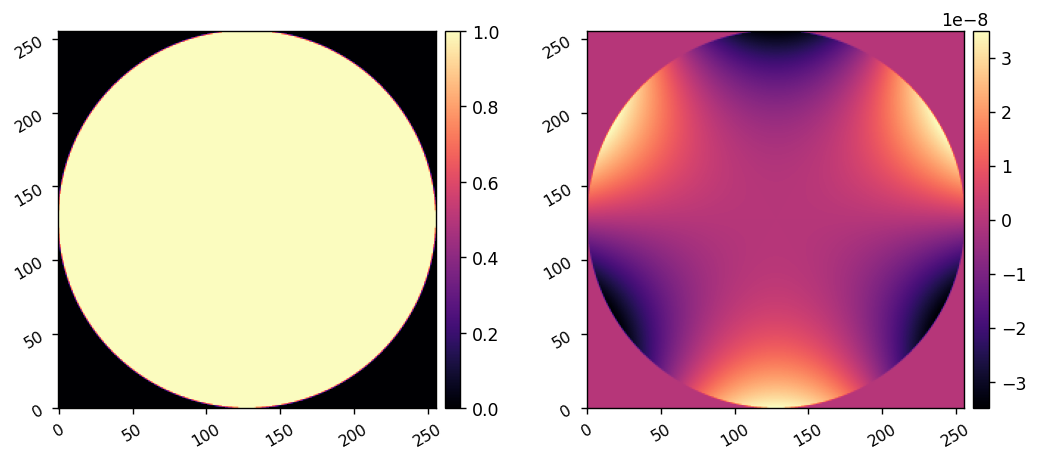

In [8]:
reload(poppy_optics)
from poppy_optics import *
clear_output()

# array_optic = poppy.fixed_sampling_optic(compound_pupil, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(m1, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(thin_lens, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(gauss_ap, wf, oversample)
array_optic = poppy.fixed_sampling_optic(zern_wfe, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(kol_wfe, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(psd_wfe, wf, oversample)

misc.myimshow2(array_optic.amplitude, array_optic.opd)

# Test the use of Deformable Mirrors.

DEBUG:poppy:Converting DM to fixed sampling with grid_size=46.3 mm, npix=256, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for DM sampled onto 1024 pixel grid with pixelscale 0.04521484375 mm / pix
INFO:poppy:Computing amplitude for DM sampled onto 1024 pixel grid with pixelscale 0.04521484375 mm / pix
DEBUG:poppy:binning down opd and transmission arrays


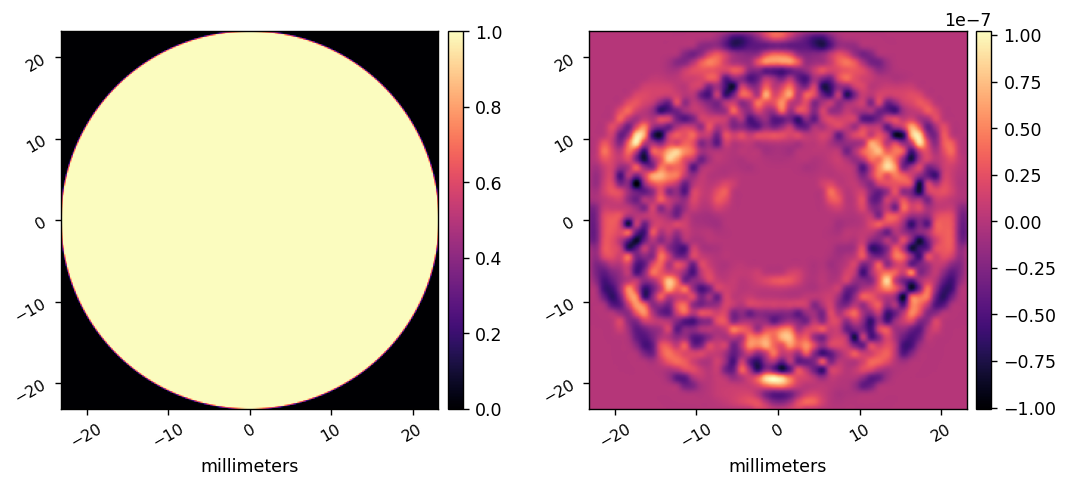

DEBUG:poppy:Converting CircSegDM to fixed sampling with grid_size=46.3 mm, npix=256, oversample=2
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for CircSegDM sampled onto 512 pixel grid with pixelscale 0.0904296875 mm / pix
INFO:poppy:Computing amplitude for CircSegDM sampled onto 512 pixel grid with pixelscale 0.0904296875 mm / pix
DEBUG:poppy:binning down opd and transmission arrays


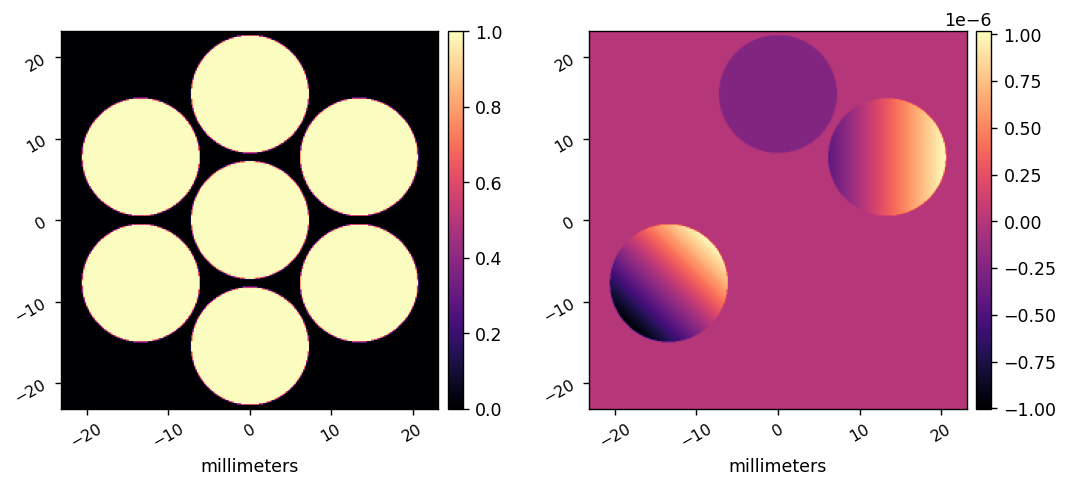

DEBUG:poppy:Converting HexDM to fixed sampling with grid_size=46.3 mm, npix=256, oversample=2
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for HexDM sampled onto 512 pixel grid with pixelscale 0.0904296875 mm / pix
INFO:poppy:Computing amplitude for HexDM sampled onto 512 pixel grid with pixelscale 0.0904296875 mm / pix
DEBUG:poppy:binning down opd and transmission arrays


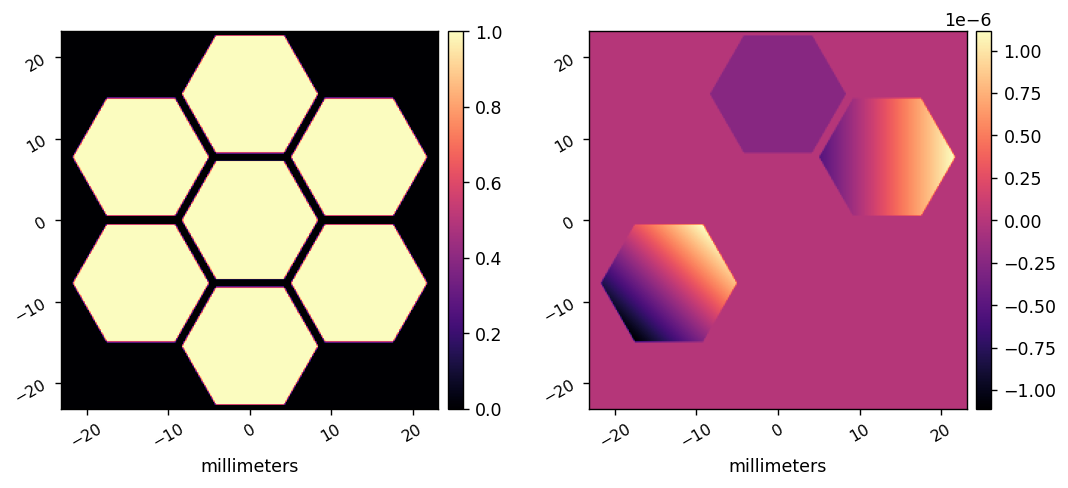

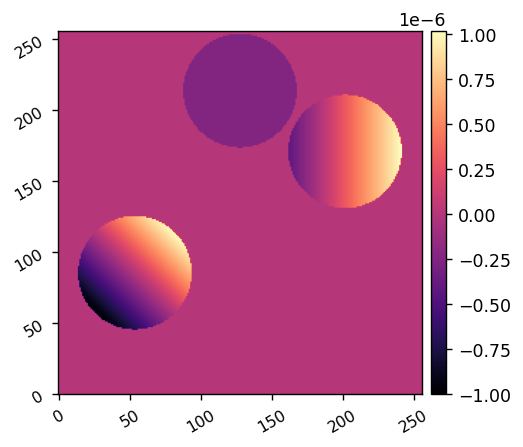

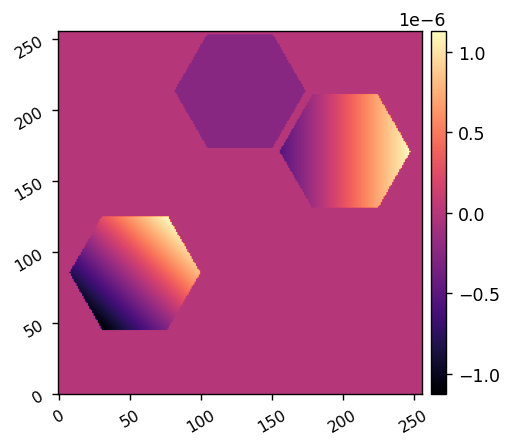

In [10]:
# Deformable Mirror Tests
array_optic = poppy.fixed_sampling_optic(DM, wf_dm, oversample)
misc.myimshow2(array_optic.amplitude, array_optic.opd, 
               pxscl1=array_optic.pixelscale, pxscl2=array_optic.pixelscale)

array_optic = poppy.fixed_sampling_optic(circ_seg_DM, wf_dm)
misc.myimshow2(array_optic.amplitude, array_optic.opd, 
               pxscl1=array_optic.pixelscale, pxscl2=array_optic.pixelscale)

array_optic = poppy.fixed_sampling_optic(hex_seg_DM, wf_dm)
misc.myimshow2(array_optic.amplitude, array_optic.opd, 
               pxscl1=array_optic.pixelscale, pxscl2=array_optic.pixelscale)

circ_seg_DM.set_actuator(1, -2.5e-7, 0, 0)
circ_seg_DM.set_actuator(2, 3e-7, 0.1*u.milliradian, 0)
circ_seg_DM.set_actuator(5, 0, 0.1*u.milliradian, 0.1*u.milliradian)

opd = circ_seg_DM.get_opd(wf_dm)
misc.myimshow(opd)

hex_seg_DM.set_actuator(1, -2.5e-7, 0, 0)
hex_seg_DM.set_actuator(2, 3e-7, 0.1*u.milliradian, 0)
hex_seg_DM.set_actuator(5, 0, 0.1*u.milliradian, 0.1*u.milliradian)

opd = hex_seg_DM.get_opd(wf_dm)
misc.myimshow(opd)

# Create the OpticalSystem and calculate a PSF. 
A variety of optics can be added by just commenting out or uncommenting some lines. This is useful for testing each optic in an actual system to make sure it functions as expected during propagation. 

In [11]:
poppy_log.disabled = False

# osys.add_pupil(circ_pupil)
osys.add_pupil(multi_circ_pupil)
# osys.add_pupil(rect_pupil)
# osys.add_pupil(square_pupil)
# osys.add_pupil(hex_pupil_side)
# osys.add_pupil(hex_pupil_flat)
# osys.add_pupil(multi_hex_pupil_side)
# osys.add_pupil(multi_hex_pupil_flat)
# osys.add_pupil(ngon_pupil)
# osys.add_pupil(sec_obs)
# osys.add_pupil(asym_sec_obs)
# osys.add_pupil(compound_pupil)
# osys.add_pupil(rpupil_array)
# osys.add_pupil(rprimary_opd_array)
# osys.add_pupil(rpupil_opd_array)
# osys.add_pupil(rpupil)
# osys.add_pupil(rprimary_opd)
# osys.add_pupil(rpupil_opd)

# osys.add_pupil(scalar_opd)
# osys.add_pupil(zern_wfe)
# osys.add_pupil(sin_wfe)
# osys.add_pupil(kol_wfe)
# osys.add_pupil(psd_wfe)

osys.add_image(scalar_trans_image)
# osys.add_image(knife_edge)
# osys.add_image(blc_circ)
# osys.add_image(blc_lin)
# osys.add_image(fqpm)
# osys.add_image(rect_stop)
# osys.add_image(square_stop)
# osys.add_image(hex_stop)
# osys.add_image(annular_stop)
# osys.add_image(circ_occ)
# osys.add_image(bar_occ)

osys.add_pupil(zern_wfe)
# osys.add_pupil(scalar_trans_pupil)
# osys.add_pupil(thin_lens)
# osys.add_pupil(gauss_ap)
# osys.add_pupil(inv_circ)
# osys.add_pupil(DM)

osys.add_detector(pixelscale=0.020, fov_arcsec=4.0)


INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy:User requested saving intermediate wavefronts in call to poppy.calc_psf
DEBUG:poppy:Already loaded wisdom prior to this calculation, not reloading.
INFO:poppy: Propagating wavelength = 5e-07 m
DEBUG:poppy:Input wavefront has wavelength=5e-07 m, npix=256, diam=2.4, pixel scale=0.00937 meters/pixel
DEBUG:poppy:  Wavefront and optic multiCirc already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: multiCirc
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Image plane: -empty-. 
DEBUG:poppy:    Padded WF array for oversampling by 4x
DEBUG:poppy:using cupy (GPU) FFT of (1024, 1024) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.000327 s, full function  in 0.001 s
DEBUG:poppy:  Multiplied WF by phasor for Image plane: -empty-
DEBUG:poppy:  Propagating wavefront to Pupil plane: Zernike WFE. 
DEBUG:poppy:

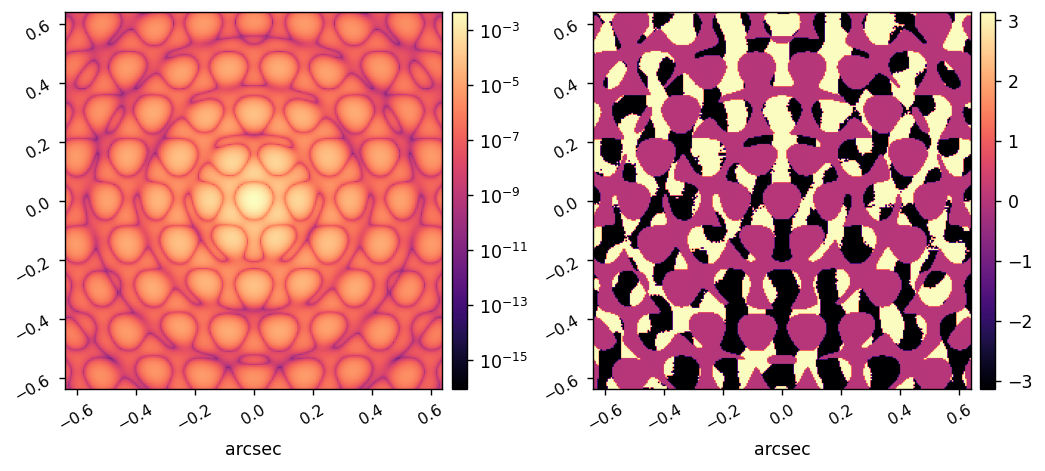

In [15]:
poppy_log.disabled = False

psf, wfs = osys.calc_psf(wavelength=wavelength, return_intermediates=True)

misc.myimshow2(wfs[-1].intensity, wfs[-1].phase, npix=256, lognorm1=True,
               pxscl1=wfs[-1].pixelscale, pxscl2=wfs[-1].pixelscale)

# Show all waves

0 0.009375 m / pix


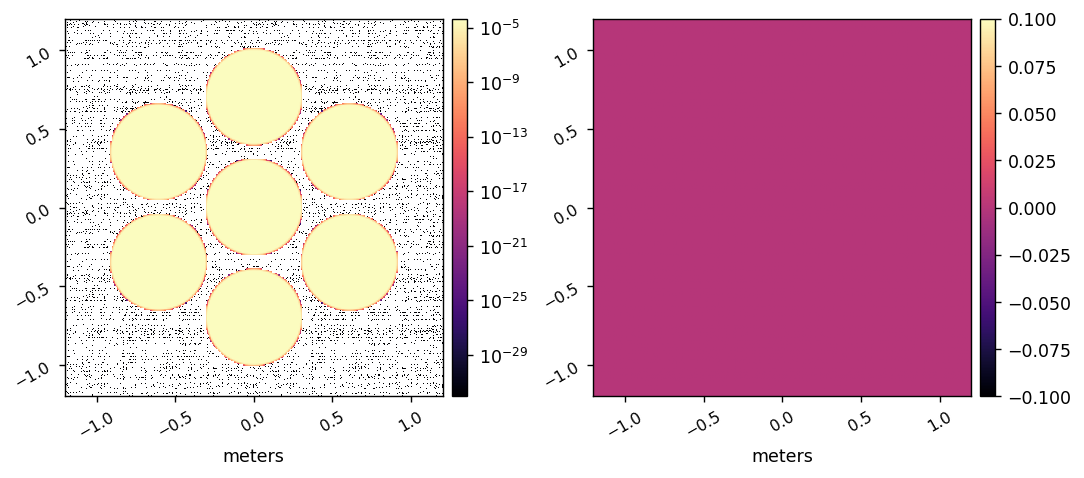

1 0.010742958658702936 arcsec / pix


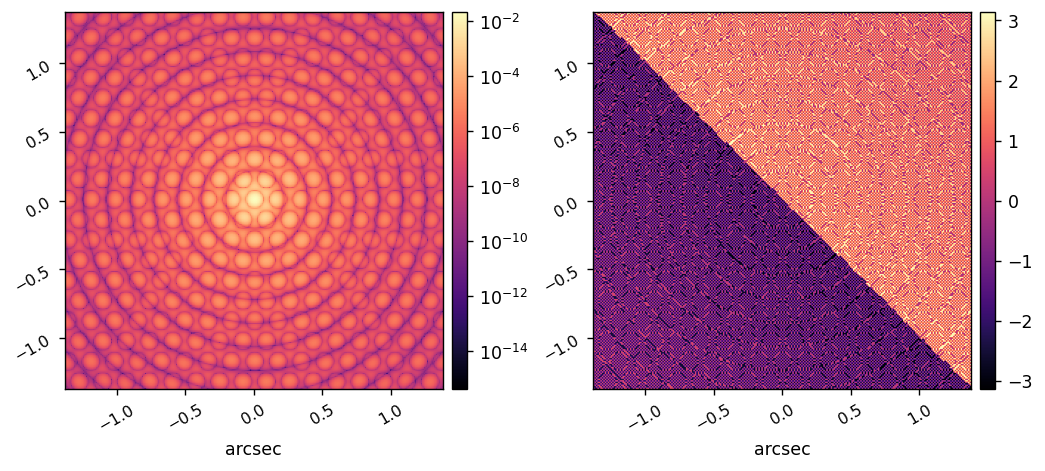

2 0.009375 m / pix


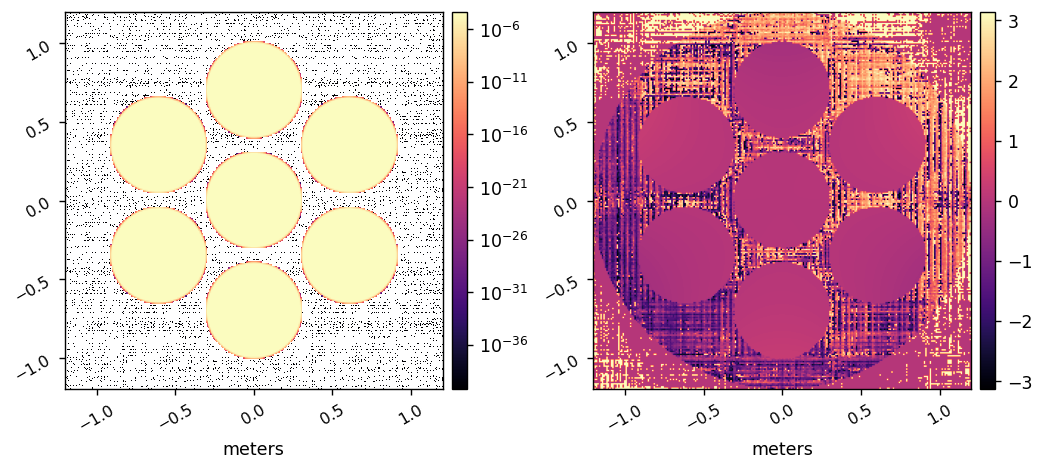

3 0.005 arcsec / pix


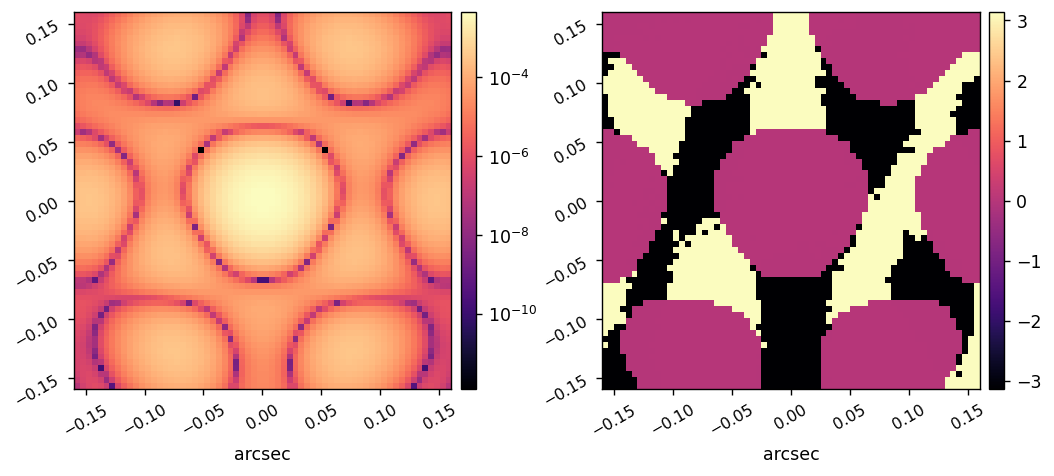

In [34]:
for i,wf in enumerate(wfs):
    if (i-len(wfs))==-1: n = 64
    else: n = npix
    misc.myimshow2(wf.intensity, wf.phase, npix=n, lognorm1=True,
                   pxscl1=wf.pixelscale, pxscl2=wf.pixelscale)